### Name: Nken Allassan
### Date: June/24/2020
### Hello, in this file i will try to do some feature engineering and data_preprocessing
### i'm not that familiar to this task but i will try my best to get insights from it let's go

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

loading my data...

In [2]:
train=pd.read_csv('allassan_train.csv')
test=pd.read_csv('allassan_test.csv')

In [3]:
train.invoice_date=pd.to_datetime(train.invoice_date)
train.creation_date=pd.to_datetime(train.creation_date)
test.invoice_date=pd.to_datetime(train.invoice_date)
test.creation_date=pd.to_datetime(train.creation_date)

creating a feature year_to_date

In [4]:
train["year_to_date"]=train.invoice_date - train.creation_date
test["year_to_date"]=test.invoice_date - test.creation_date

dropping counter_code and tarif_type since they have thesame pattern as counter type

In [5]:
train.drop(['counter_code','tarif_type'],axis=1,inplace=True)
test.drop(['counter_code','tarif_type'],axis=1,inplace=True)

creating a feature known as consomation_add adding the different consomation level and comparing it with a new feature known as index_calc to see if the coencide if not we create a new feature called good and bad counters see the _eda_file_

In [6]:
train['consomation_add']=train.consommation_level_1 + train.consommation_level_2 + train.consommation_level_3 + train.consommation_level_4
test['consomation_add']=test.consommation_level_1 + test.consommation_level_2 + test.consommation_level_3 + test.consommation_level_4

In [7]:
train['index_calc']=train.new_index - train.old_index
test['index_calc']=test.new_index - test.old_index

In [8]:
index=train[(train.consomation_add != train.index_calc)].index
index_test=test[(test.consomation_add != test.index_calc)].index

In [9]:
train.loc[index,'counter_error']=1
test.loc[index_test,'counter_error']=1

In [10]:
index=train[(train.consomation_add == train.index_calc)].index
index_test=test[(test.consomation_add == test.index_calc)].index

In [11]:
train.loc[index,'counter_error']=0
test.loc[index_test,'counter_error']=0

now we are going to create a future which will help us determine the month number as good months if months<=12 or bad months if months>12

In [12]:
index=train[train.months_number<=12].index
index_test=test[test.months_number<=12].index

In [13]:
train.loc[index,'month_error']=0
test.loc[index_test,'month_error']=0

In [14]:
index=train[train.months_number>12].index
index_test=test[test.months_number>12].index

In [15]:
train.loc[index,'month_error']=1
test.loc[index_test,'month_error']=1

now we are going to create a feature concerning the year of invoice cause we noticed a leakage there
1. in the competition it is said that the billing start in year 2005
2. in the dataset we have some billing starting several yeas before..we need to classify them as good years and bad years

In [16]:
train['invoice_date']=train['invoice_date'].astype(str)
test['invoice_date']=test['invoice_date'].astype(str)

In [17]:
train['invoice_date']=train['invoice_date'].apply(lambda x: x[0:4])
test['invoice_date']=test['invoice_date'].apply(lambda x: x[0:4])

In [18]:
train.invoice_date=train.invoice_date.astype(int)
test.invoice_date=test.invoice_date.astype(int)

In [19]:
index=train[train.invoice_date<2005].index
index_test=test[test.invoice_date<2005].index

In [20]:
train.loc[index,'year_error']=1
test.loc[index_test,'year_error']=1

In [21]:
index=train[train.invoice_date>=2005].index
index_test=test[test.invoice_date>=2005].index

In [22]:
train.loc[index,'year_error']=0
test.loc[index_test,'year_error']=0

now i will drop all the unecessary columns or the columns having thesame patern

In [23]:
train.drop(['invoice_date','client_id','consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4','consomation_add','year_to_date'],axis=1,inplace=True)

test.drop(['invoice_date','client_id','consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4','consomation_add','year_to_date'],axis=1,inplace=True)

In [24]:
train.drop(['creation_date','old_index','new_index','months_number'],axis=1,inplace=True)
test.drop(['creation_date','old_index','new_index','months_number'],axis=1,inplace=True)

train.drop(['counter_number','region'],axis=1,inplace=True)
test.drop(['counter_number','region'],axis=1,inplace=True)

In [25]:
train.head()

,disrict,client_catg,target,counter_statue,reading_remarque,counter_coefficient,counter_type,index_calc,counter_error,month_error,year_error
0,60,11,0.0,0,8,1,ELEC,82,0.0,0.0,0.0
1,69,11,0.0,0,8,1,ELEC,388,0.0,0.0,0.0
2,62,11,0.0,0,8,1,ELEC,407,0.0,0.0,0.0
3,69,11,0.0,0,6,1,ELEC,0,0.0,0.0,0.0
4,62,11,0.0,0,9,1,ELEC,959,0.0,0.0,0.0


In [26]:
test.client_catg=test.client_catg.astype('str')

In [27]:
train.client_catg=train.client_catg.astype('str')

### creating categorical variable for the reading remarque

In [28]:
#train
index_1=train[train.reading_remarque==6].index.to_list()
index_2=train[train.reading_remarque==9].index.to_list()
index_3=train[train.reading_remarque==8].index.to_list()
index_4=train[train.reading_remarque==7].index.to_list()
index_5=train[train.reading_remarque==203].index.to_list()
index_6=train[train.reading_remarque==413].index.to_list()

In [29]:
p=index_4+index_5+index_6

In [30]:
train.loc[index_1,'reading_remarque']=6
train.loc[index_2,'reading_remarque']=9
train.loc[index_3,'reading_remarque']=8
train.loc[p,'reading_remarque']=7

In [31]:
train.reading_remarque=train.reading_remarque.astype('str')

In [32]:
test.reading_remarque=test.reading_remarque.astype('str')

### creating categroies for counter_coefficient

In [33]:
#train
index_1=train[train.counter_coefficient==1].index.to_list()
index_2=train[train.counter_coefficient==2].index.to_list()
index_3=train[train.counter_coefficient==3].index.to_list()
index_4=train[train.counter_coefficient==40].index.to_list()
index_5=train[train.counter_coefficient==6].index.to_list()
index_6=train[train.counter_coefficient==50].index.to_list()
index_7=train[train.counter_coefficient==30].index.to_list()
index_8=train[train.counter_coefficient==20].index.to_list()
index_9=train[train.counter_coefficient==0].index.to_list()

In [34]:
q=index_3+index_4+index_5+index_6+index_7+index_8+index_9

In [35]:
train.loc[index_1,'counter_coefficient']=1
train.loc[index_2,'counter_coefficient']=2
train.loc[q,'counter_coefficient']=3

In [36]:
train.counter_coefficient=train.counter_coefficient.astype('str')

In [37]:
#test
index_1=test[test.counter_coefficient==1].index.to_list()
index_2=test[test.counter_coefficient==2].index.to_list()
index_3=test[test.counter_coefficient==3].index.to_list()
index_4=test[test.counter_coefficient==10].index.to_list()
index_5=test[test.counter_coefficient==4].index.to_list()

In [38]:
r=index_3+index_4+index_5

In [39]:
test.loc[index_1,'counter_coefficient']=1
test.loc[index_2,'counter_coefficient']=2
test.loc[r,'counter_coefficient']=3

In [40]:
test.counter_coefficient=test.counter_coefficient.astype('str')

### creating categories for counter_statue

In [41]:
index_1=train[train.counter_statue==2].index.to_list()
index_2=train[train.counter_statue==618].index.to_list()
index_3=train[train.counter_statue==269375].index.to_list()

In [42]:
s=index_1+index_2+index_3

In [43]:
train.loc[s,'counter_statue']=2

In [44]:
train.counter_statue=train.counter_statue.astype('str')

In [45]:
test.counter_statue=test.counter_statue.astype('str')

In [46]:
train.head()

,disrict,client_catg,target,counter_statue,reading_remarque,counter_coefficient,counter_type,index_calc,counter_error,month_error,year_error
0,60,11,0.0,0,8,1,ELEC,82,0.0,0.0,0.0
1,69,11,0.0,0,8,1,ELEC,388,0.0,0.0,0.0
2,62,11,0.0,0,8,1,ELEC,407,0.0,0.0,0.0
3,69,11,0.0,0,6,1,ELEC,0,0.0,0.0,0.0
4,62,11,0.0,0,9,1,ELEC,959,0.0,0.0,0.0


In [47]:
train.reading_remarque.value_counts()

6    65287
9    47991
8    21979
7      236
Name: reading_remarque, dtype: int64

In [48]:
train.reading_remarque=train.reading_remarque.astype('str')

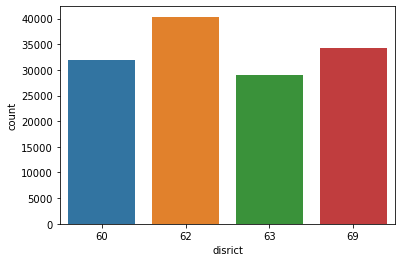

In [49]:
sns.countplot(data=train,x='disrict')

In [50]:
train.dtypes

disrict                  int64
client_catg             object
target                 float64
counter_statue          object
reading_remarque        object
counter_coefficient     object
counter_type            object
index_calc               int64
counter_error          float64
month_error            float64
year_error             float64
dtype: object

In [51]:
le=LabelEncoder()
le.fit(train.counter_type)
train.counter_type=le.transform(train.counter_type)

In [52]:
#le.fit(train.counter_statue)
#train.counter_statue=le.transform(train.counter_statue)

In [53]:
le.fit(test.counter_type)
test.counter_type=le.transform(test.counter_type)

In [54]:
train.head()

,disrict,client_catg,target,counter_statue,reading_remarque,counter_coefficient,counter_type,index_calc,counter_error,month_error,year_error
0,60,11,0.0,0,8,1,0,82,0.0,0.0,0.0
1,69,11,0.0,0,8,1,0,388,0.0,0.0,0.0
2,62,11,0.0,0,8,1,0,407,0.0,0.0,0.0
3,69,11,0.0,0,6,1,0,0,0.0,0.0,0.0
4,62,11,0.0,0,9,1,0,959,0.0,0.0,0.0


In [55]:
index_1=train[train.disrict==60].index.to_list()
index_2=train[train.disrict==62].index.to_list()
index_3=train[train.disrict==63].index.to_list()
index_4=train[train.disrict==69].index.to_list()
index_11=test[test.disrict==60].index.to_list()
index_12=test[test.disrict==62].index.to_list()
index_13=test[test.disrict==63].index.to_list()
index_14=test[test.disrict==69].index.to_list()

In [56]:
test.loc[index_11,'disrict']=1
test.loc[index_12,'disrict']=2
test.loc[index_13,'disrict']=3
test.loc[index_14,'disrict']=4
train.loc[index_1,'disrict']=1
train.loc[index_2,'disrict']=2
train.loc[index_3,'disrict']=3
train.loc[index_4,'disrict']=4

In [57]:
test.client_catg.value_counts()

11    56305
12     1054
51      710
Name: client_catg, dtype: int64

In [58]:
index_1=train[train.client_catg==11].index.to_list()
index_2=train[train.client_catg==12].index.to_list()
index_3=train[train.client_catg==51].index.to_list()
index_11=test[test.client_catg==11].index.to_list()
index_12=test[test.client_catg==12].index.to_list()
index_13=test[test.client_catg==51].index.to_list()

In [59]:
test.loc[index_11,'client_catg']=1
test.loc[index_12,'client_catg']=2
test.loc[index_13,'client_catg']=3
train.loc[index_1,'client_catg']=1
train.loc[index_2,'client_catg']=2
train.loc[index_3,'client_catg']=3

In [60]:
train.head(10)

,disrict,client_catg,target,counter_statue,reading_remarque,counter_coefficient,counter_type,index_calc,counter_error,month_error,year_error
0,1,11,0.0,0,8,1,0,82,0.0,0.0,0.0
1,4,11,0.0,0,8,1,0,388,0.0,0.0,0.0
2,2,11,0.0,0,8,1,0,407,0.0,0.0,0.0
3,4,11,0.0,0,6,1,0,0,0.0,0.0,0.0
4,2,11,0.0,0,9,1,0,959,0.0,0.0,0.0
5,4,11,0.0,0,9,1,1,693,0.0,0.0,0.0
6,2,11,0.0,1,6,1,0,1102,0.0,0.0,0.0
7,1,11,0.0,0,8,1,1,94,0.0,0.0,0.0
8,2,11,0.0,0,9,1,0,218,0.0,0.0,0.0
9,1,11,0.0,0,9,1,0,11153,0.0,0.0,0.0


In [61]:
train.client_catg=train.client_catg.astype('str')

In [62]:
test.client_catg=test.client_catg.astype('str')

In [63]:
test.dtypes

disrict                  int64
client_catg             object
counter_statue          object
reading_remarque        object
counter_coefficient     object
counter_type             int32
index_calc               int64
counter_error          float64
month_error            float64
year_error             float64
dtype: object

### now lets try to normalize our data and save it

In [64]:
#train
#train.client_catg=train.client_catg/10
#train.disrict=train.disrict/10
#train.counter_statue=train.counter_statue/10
#train.reading_remarque=train.reading_remarque/10
#train.counter_coefficient=train.counter_coefficient/10

In [65]:
#test
#test.client_catg=test.client_catg/10
#test.disrict=test.disrict/10
#test.counter_statue=test.counter_statue/10
#test.reading_remarque=test.reading_remarque/10
#test.counter_coefficient=test.counter_coefficient/10

In [66]:
test.head()

,disrict,client_catg,counter_statue,reading_remarque,counter_coefficient,counter_type,index_calc,counter_error,month_error,year_error
0,2,11,0,8,1,0,755,0.0,0.0,0.0
1,4,11,0,9,1,0,1380,0.0,0.0,0.0
2,2,11,0,9,1,0,884,0.0,0.0,0.0
3,1,11,0,6,1,0,562,0.0,0.0,0.0
4,2,11,0,9,1,0,860,0.0,0.0,0.0


In [69]:
train.to_csv('prep_train.csv',index=False)
test.to_csv('prep_test.csv',index=False)

In [68]:
train.dtypes

disrict                  int64
client_catg             object
target                 float64
counter_statue          object
reading_remarque        object
counter_coefficient     object
counter_type             int32
index_calc               int64
counter_error          float64
month_error            float64
year_error             float64
dtype: object

In [1]:
#what about target encoding of the counter type?..